https://www.kaggle.com/ipbyrne/income-prediction-84-369-accuracy

## 1. Load Libaraies

First, we need to load all of our libraries we will use for this project.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings('ignore')

import pathlib
from mlxtend.evaluate import feature_importance_permutation
sns.set(style='white', context='notebook', palette='deep')
init_notebook_mode(connected=True)
cf.go_offline()

import joblib

##2. Load Data

Next, we load our data.

In [2]:
cwd = pathlib.Path.cwd()
dataset = pd.read_csv(cwd/'adult_dataset'/'adult.data', names = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income'])

# Replace All Null Data in NaN
dataset = dataset.fillna(np.nan)

le= LabelEncoder()
dataset['income'] = le.fit_transform(dataset['income'])

# Identify Numeric features
numeric_features = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week','income']

# Identify Categorical features
cat_features = ['workclass','education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native']

# Fill Missing Category Entries
dataset["workclass"] = dataset["workclass"].fillna("X")
dataset["occupation"] = dataset["occupation"].fillna("X")
dataset["native_country"] = dataset["native_country"].fillna("United-States")

# Create Married Column - Binary Yes(1) or No(0)
dataset["marital_status"] = dataset["marital_status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
dataset["marital_status"] = dataset["marital_status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')

# dataset.drop(labels=["workclass","education","occupation","relationship","race","native_country"], axis = 1, inplace = True)

In [6]:
X = dataset.drop(columns='income')
X = pd.get_dummies(X)
Y = dataset['income']

validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_test, y_train, y_test = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Tuned Params for Random Forest
# num_trees = 250
# max_features = 5
num_trees = 100
max_features = 3

In [21]:
validation_size = 0.20
seed = 7
scoring = 'accuracy'
X_train, X_test, y_train, y_test = train_test_split(X,Y,
    test_size=validation_size,random_state=seed)

# Tuned Params for Random Forest
# num_trees = 250
# max_features = 5
num_trees = 100
max_features = 3

In [7]:
# Adding random feature
X_train['random'] = np.random.random(len(X_train))
X_test['random'] = np.random.random(len(X_test))

# Logistic Regression

In [73]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_ts = scaler.transform(X_test)
logit = LogisticRegressionCV(cv=3,class_weight='balanced', penalty='l1', solver='liblinear')
logit.fit(X_tr, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l1', random_state=None, refit=True, scoring=None,
                     solver='liblinear', tol=0.0001, verbose=0)

In [82]:
predictions = logit.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 23.982803623522187%
[[   0 4951]
 [   0 1562]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4951
           1       0.24      1.00      0.39      1562

    accuracy                           0.24      6513
   macro avg       0.12      0.50      0.19      6513
weighted avg       0.06      0.24      0.09      6513



In [92]:
feat_imp = pd.DataFrame({'features': X_train.columns.tolist(), "coefficients": logit.coef_.ravel()}).sort_values('coefficients', ascending=False)
feat_imp = feat_imp.head(25)
feat_imp.iplot(kind='bar',
               y='coefficients',
               x='features',
               yTitle='Coefficients',
               xTitle='Features',
               title='Logistic Regression',
              )

# RF

In [23]:
rf = RandomForestClassifier(n_estimators=250,max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 85.69015814524796%
[[4604  347]
 [ 585  977]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4951
           1       0.74      0.63      0.68      1562

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [8]:
rf = RandomForestClassifier(n_estimators=250,max_features=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print("Accuracy: %s%%" % (100*accuracy_score(y_test, predictions)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 85.65945033010901%
[[4601  350]
 [ 584  978]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4951
           1       0.74      0.63      0.68      1562

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [13]:
joblib.dump(rf, "adult_rf_model.sav")

['adult_rf_model.sav']

## Feature Importances

### Mean Decrease Impurity

In [10]:
feat_imp = pd.DataFrame({'features': X_train.columns.tolist(), "mean_decrease_impurity": rf.feature_importances_}).sort_values('mean_decrease_impurity', ascending=False)
feat_imp = feat_imp.head(25)
feat_imp.iplot(kind='bar',
               y='mean_decrease_impurity',
               x='features',
               yTitle='Mean Decrease Impurity',
               xTitle='Features',
               title='Mean Decrease Impurity',
              )

In [11]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
all_feat_imp_df = pd.DataFrame(data=[tree.feature_importances_ for tree in 
                                     rf],
                               columns=X_train.columns)
order_column = all_feat_imp_df.mean(axis=0).sort_values(ascending=False).index.tolist()


all_feat_imp_df[order_column[:25]].iplot(kind='box', xTitle = 'Features', yTitle='Mean Decease Impurity')

### Permutation Importance

In [15]:
imp_vals, all_trials = feature_importance_permutation(
    predict_method=rf.predict, 
    X=X_test.values,
    y=y_test.values,
    metric='r2',
    num_rounds=50, #This takes sometime. You can reduce this number to make the process faster
    seed=1)

In [16]:
joblib.dump(imp_vals, "adult_permutation_imp_vals.sav")
joblib.dump(all_trials, "adult_permutation_all_trials.sav")

['adult_permutation_all_trials.sav']

In [18]:
permutation_importance = pd.DataFrame({'features': X_train.columns.tolist(), "permutation_importance": imp_vals}).sort_values('permutation_importance', ascending=False)
permutation_importance = permutation_importance.head(25)
permutation_importance.iplot(kind='bar',
               y='permutation_importance',
               x='features',
               yTitle='Permutation Importance',
               xTitle='Features',
               title='Permutation Importances',
              )

In [19]:
# get the feature importances from each tree and then visualize the
# distributions as boxplots
all_feat_imp_df = pd.DataFrame(data=np.transpose(all_trials),
                               columns=X_train.columns, index = range(0,50))
order_column = all_feat_imp_df.mean(axis=0).sort_values(ascending=False).index.tolist()

all_feat_imp_df[order_column[:25]].iplot(kind='box', xTitle = 'Features', yTitle='Permutation Importance')

### Shapely Values

In [20]:
import shap

# load JS visualization code to notebook
shap.initjs()

In [21]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

In [22]:
joblib.dump(explainer, "adult_tree_explainer.sav")
joblib.dump(shap_values, "adult_tree_explainer_shap_values.sav")

['adult_tree_explainer_shap_values.sav']

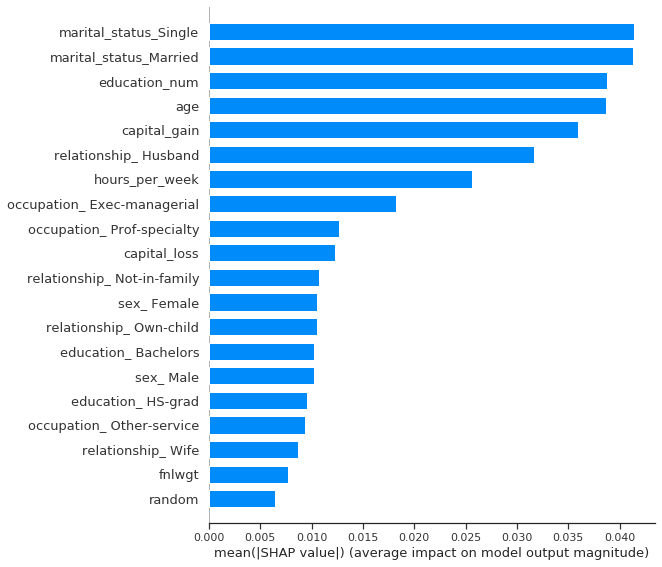

In [26]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X_test, plot_type='bar')

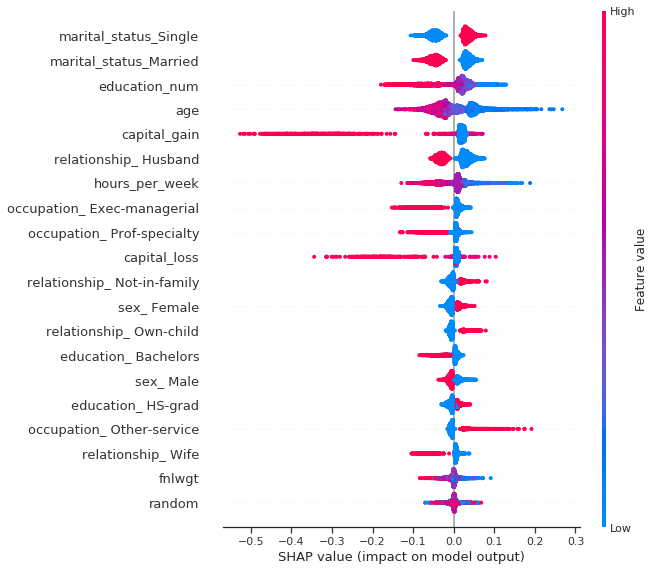

In [27]:
# summarize the effects of all the features
shap.summary_plot(shap_values[0], X_test)

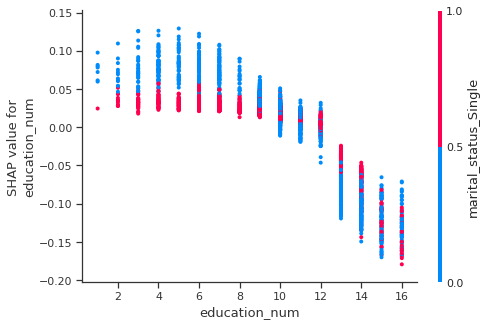

In [30]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("education_num", shap_values[0], X_test)

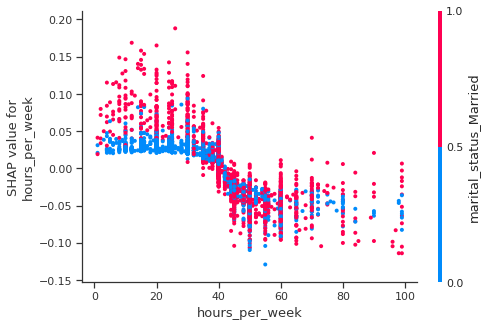

In [31]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("hours_per_week", shap_values[0], X_test)

## Individual Predictions

In [61]:
import lime
import lime.lime_tabular

In [63]:
# Creating the Lime Explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(X_test, 
                                                   feature_names=X_train.columns.tolist(), 
                                                   class_names=['>50k, <50k'], 
                                                  discretize_continuous=False)

In [64]:
row = 4
display(X_train.iloc[4])
display(y_train.iloc[4])

age                                    48.000000
fnlwgt                             193775.000000
education_num                          13.000000
capital_gain                            0.000000
capital_loss                            0.000000
                                       ...      
native_country_ Trinadad&Tobago         0.000000
native_country_ United-States           1.000000
native_country_ Vietnam                 0.000000
native_country_ Yugoslavia              0.000000
random                                  0.381613
Name: 14883, Length: 104, dtype: float64

1

In [65]:
shap.force_plot(explainer.expected_value[0], shap_values[0][row], features=X_train.iloc[4], feature_names=X_train.columns,
                link='identity')

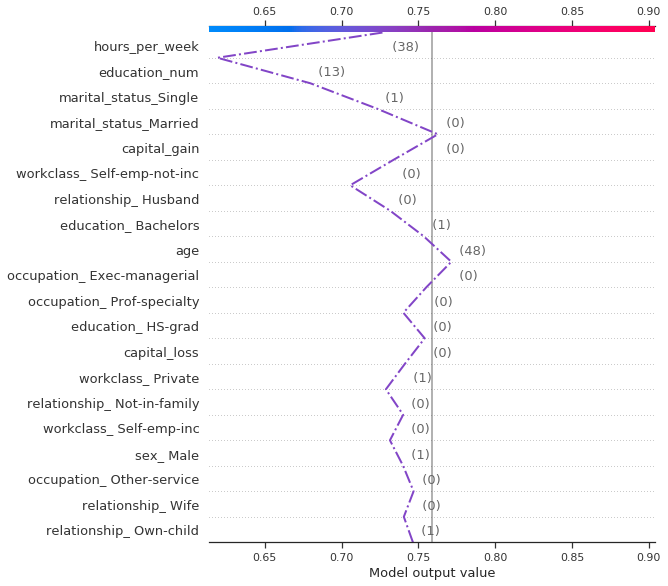

In [66]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][row], features=X_train.iloc[4], feature_names=X_train.columns.tolist(),
                link='identity', highlight=0,)

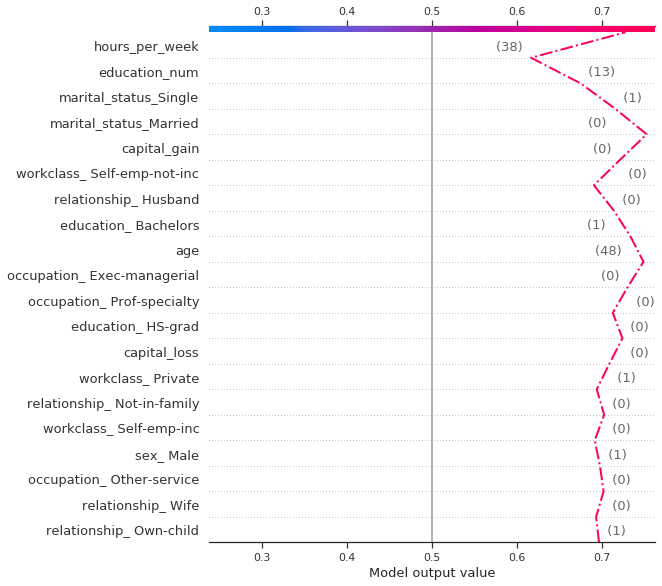

In [67]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][row], features = X_train.iloc[4], feature_names=X_train.columns.tolist(),
                link='identity', highlight=0, new_base_value=0.5)

In [69]:
exp = lime_explainer.explain_instance(X_test.iloc[row], rf.predict_proba, num_features=5)

exp.show_in_notebook(show_table=True)

In [70]:
row = 298
display(X_train.iloc[4])
display(y_train.iloc[4])

age                                    48.000000
fnlwgt                             193775.000000
education_num                          13.000000
capital_gain                            0.000000
capital_loss                            0.000000
                                       ...      
native_country_ Trinadad&Tobago         0.000000
native_country_ United-States           1.000000
native_country_ Vietnam                 0.000000
native_country_ Yugoslavia              0.000000
random                                  0.381613
Name: 14883, Length: 104, dtype: float64

1

In [57]:
shap.force_plot(explainer.expected_value[0], shap_values[0][row],features = X_train.iloc[4], feature_names=X_train.columns,
                link='identity')

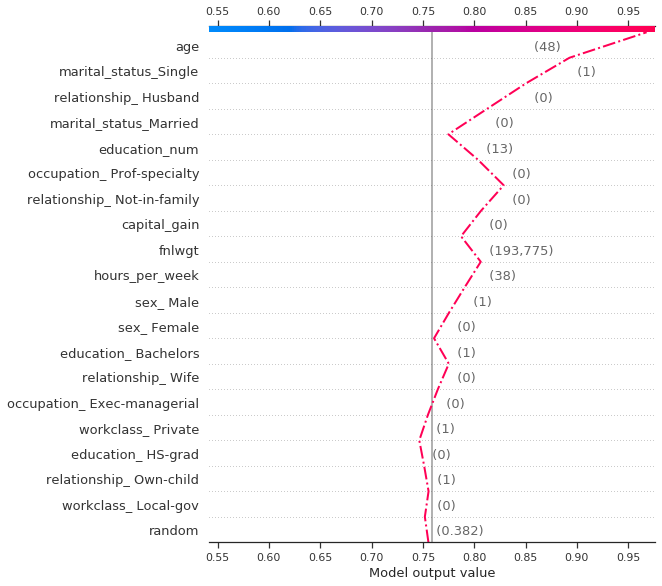

In [58]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][row],features = X_train.iloc[4], feature_names=X_train.columns.tolist(),
                link='identity', highlight=0,)

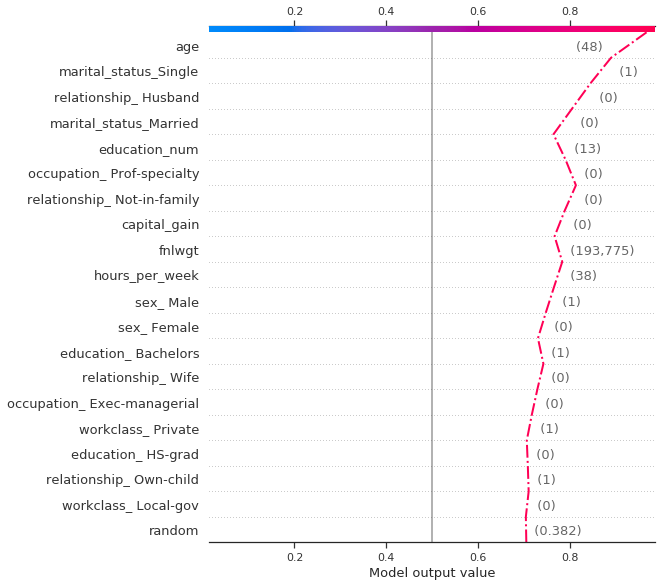

In [59]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][row],features = X_train.iloc[4], feature_names=X_train.columns.tolist(),
                link='identity', highlight=0, new_base_value=0.5)

In [72]:
exp = lime_explainer.explain_instance(X_test.iloc[row], rf.predict_proba, num_features=5)

exp.show_in_notebook(show_table=True)